In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [4]:
df = df.iloc[:,1:5]
#k_fit = kmeans.fit(df)

In [7]:
k_fit.n_clusters

4

In [8]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [9]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [13]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ]])

In [14]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [15]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df)
k_fit.cluster_centers_

array([[ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

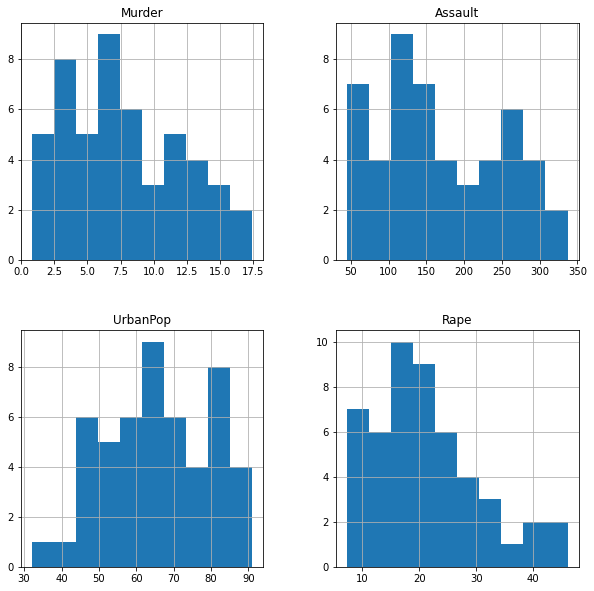

In [16]:
df.hist(figsize = (10,10));

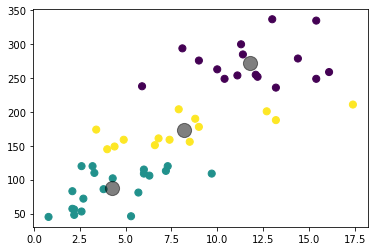

In [22]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
k_fit.cluster_centers_
clusters = k_fit.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

In [39]:
!pip install --upgrade matplotlib --user
import mpl_toolkits

In [26]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
centers = k_fit.labels_
clusters = kmeans.cluster_centers_

In [27]:
from mpl_toolkits.mplot3d import Axes3D

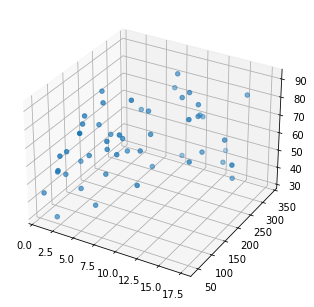

In [43]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);



In [36]:
!pip install yellowbrick

  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\emrehan\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [37]:
!pip3 install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\emrehan\\Anaconda3\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:

from yellowbrick.cluster import KElbowVisualizer

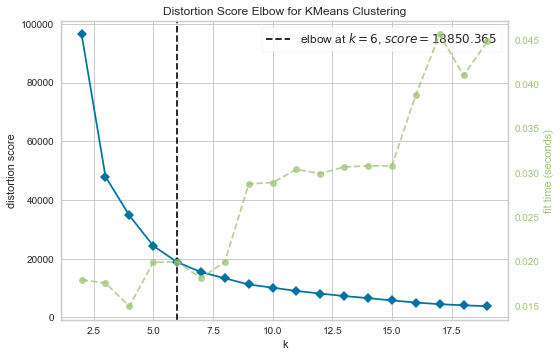

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df) 
visualizer.poof()  


In [7]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [8]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

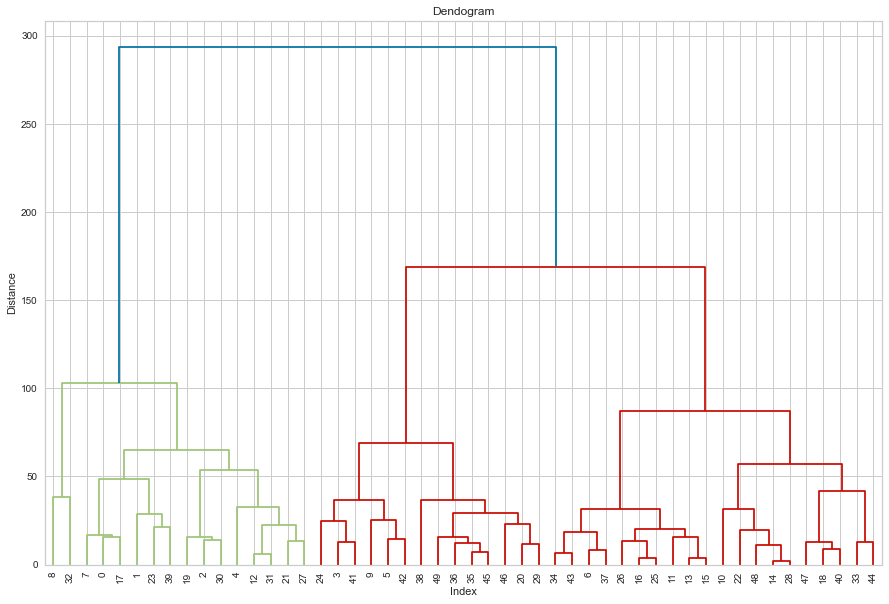

In [9]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Dendogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

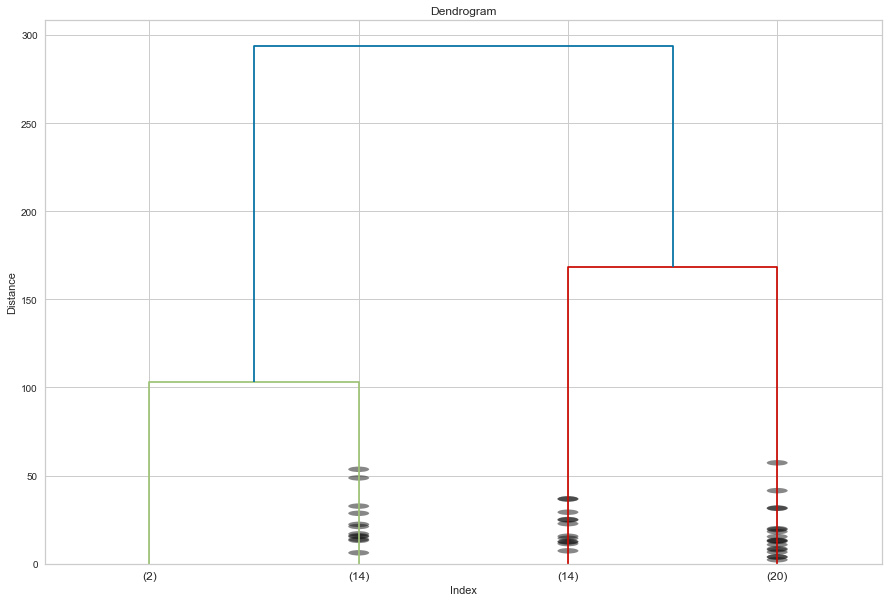

In [14]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

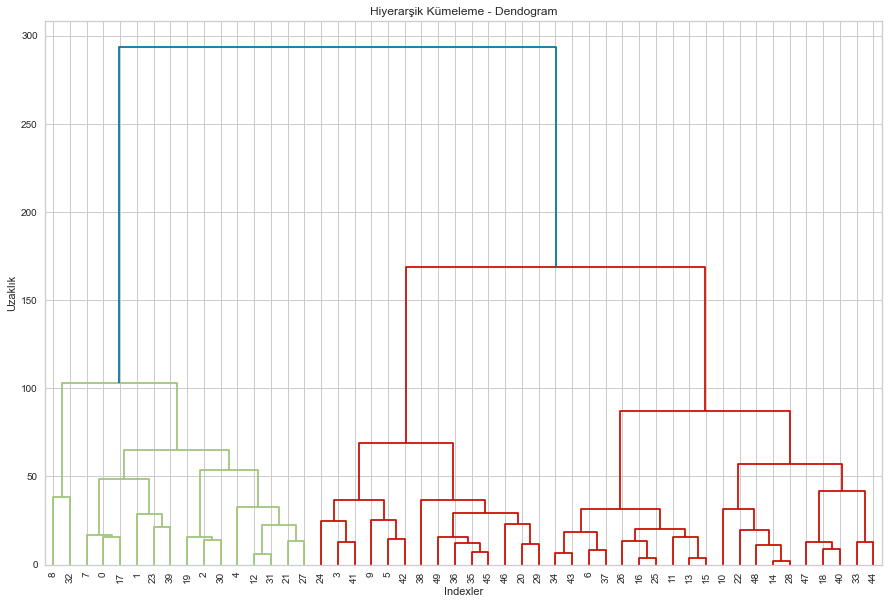

In [11]:
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [12]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2']}
Length:      6
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [13]:
?dendogram

Object `dendogram` not found.


In [15]:
?dendrogram


Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [17]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [22]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

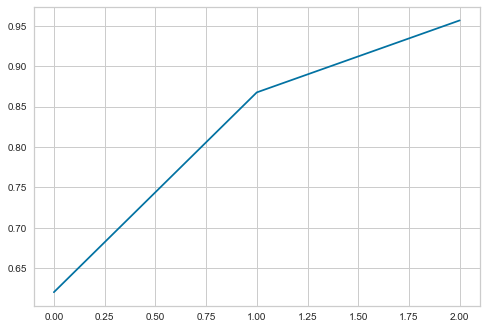

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [26]:
components_df = pd.DataFrame(data = pca_fit, 
                          columns = ["C1","C2","C3"])

In [28]:
components_df.head()

C1        C2        C3
0  0.985566  1.133392 -0.444269
1  1.950138  1.073213  2.040003
2  1.763164 -0.745957  0.054781
3 -0.141420  1.119797  0.114574
4  2.523980 -1.542934  0.598557

In [39]:
x=components_df["C1"]
y=components_df["C2"]

plt.scatter(x, y)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
new_df=components_df[["C1","C2"]]

In [43]:
new_df.head()

C1        C2
0  0.985566  1.133392
1  1.950138  1.073213
2  1.763164 -0.745957
3 -0.141420  1.119797
4  2.523980 -1.542934

In [44]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(new_df)
k_fit.cluster_centers_

array([[-1.10781782, -0.19978289],
       [ 1.66172672,  0.29967433]])

In [47]:
k_fit.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [65]:
#plt.scatter(new_df["C1"], new_df["C2"],hue=k_fit.labels_)
new_df["labels"]=x
#sns.pairplot(new_df,hue=k_fit.labels_);
new_df["labels"]

0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    1
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: labels, dtype: int32

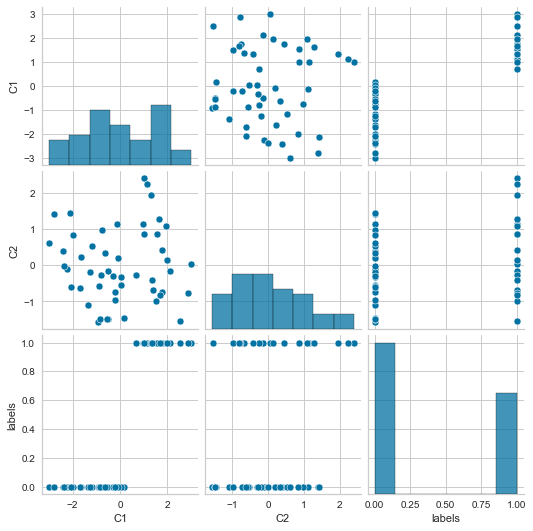

In [67]:
sns.pairplot(new_df);

NameError: name 'labels' is not defined

In [60]:
x=k_fit.labels_.copy()

In [61]:
x

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])